# **Analyzing and Predicting Apple and Tesla Stocks**

### **Submitted by:**
#### **<span style="color:red;">1. Azeen Hodekar </span>**
#### **<span style="color:red;">2. Maryam Panjri </span>**

## **Basic Objective of the Project**

#### The basic objective of this case study is to comprehensively analyze the AAPL and TSLA data spanning from 2016 to 2023 obtained from finance.yahoo.com. and predict the stock prices for the next few days.

## **Understanding Data**

#### Downloaded daily stock data of two tech giants AAPL and TSLA of the year 2016 to 2023 from finance.yahoo.com and will be using this data for analysis.

### **Import the libraries**

In [1]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### **Data Preparation and Cleaning**

1. Load the file using Pandas
2. Look at some information about the data and the columns
3. Fix or Remove any missing or incorrect values which is not useful for analysis.

#### **Loading the file using Pandas**

In [2]:
# Loading AAPL dataset using Pandas
apple_df = pd.read_csv('AAPL.csv', parse_dates=['Date'])

# Loading TSLA dataset using Pandas
tesla_df = pd.read_csv('TSLA.csv', parse_dates=['Date'])

In [3]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-21,27.530001,27.997499,27.502501,27.932501,25.995340,117058400
1,2016-11-22,27.987499,28.105000,27.850000,27.950001,26.011633,103862000
2,2016-11-23,27.840000,27.877501,27.582500,27.807501,25.879009,109705600
3,2016-11-25,27.782499,27.967501,27.737499,27.947500,26.009298,45903600
4,2016-11-28,27.857500,28.117500,27.847500,27.892500,25.958117,108776000
...,...,...,...,...,...,...,...
1756,2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400
1757,2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500
1758,2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900
1759,2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700


In [4]:
tesla_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-21,12.336000,12.592667,12.294000,12.301333,12.301333,65415000
1,2016-11-22,12.389333,12.764667,12.247333,12.744667,12.744667,84051000
2,2016-11-23,12.707333,13.042667,12.600000,12.876000,12.876000,73378500
3,2016-11-25,12.909333,13.149333,12.909333,13.110000,13.110000,35491500
4,2016-11-28,13.032000,13.290000,12.970000,13.074667,13.074667,67938000
...,...,...,...,...,...,...,...
1756,2023-11-14,235.029999,238.139999,230.720001,237.410004,237.410004,149771600
1757,2023-11-15,239.289993,246.699997,236.449997,242.839996,242.839996,150354000
1758,2023-11-16,239.490005,240.880005,230.960007,233.589996,233.589996,136816800
1759,2023-11-17,232.000000,237.389999,226.539993,234.300003,234.300003,142532800


#### **Looking at some information about the data and the columns**

In [5]:
# Displaying first few rows of the AAPL DataFrame
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-21,27.530001,27.997499,27.502501,27.932501,25.995340,117058400
1,2016-11-22,27.987499,28.105000,27.850000,27.950001,26.011633,103862000
2,2016-11-23,27.840000,27.877501,27.582500,27.807501,25.879009,109705600
3,2016-11-25,27.782499,27.967501,27.737499,27.947500,26.009298,45903600
4,2016-11-28,27.857500,28.117500,27.847500,27.892500,25.958117,108776000


In [6]:
# Displaying first few rows of the TSLA DataFrame
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-21,12.336000,12.592667,12.294000,12.301333,12.301333,65415000
1,2016-11-22,12.389333,12.764667,12.247333,12.744667,12.744667,84051000
2,2016-11-23,12.707333,13.042667,12.600000,12.876000,12.876000,73378500
3,2016-11-25,12.909333,13.149333,12.909333,13.110000,13.110000,35491500
4,2016-11-28,13.032000,13.290000,12.970000,13.074667,13.074667,67938000


In [7]:
# Displaying last few rows of the AAPL DataFrame
apple_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1756,2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400
1757,2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500
1758,2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900
1759,2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
1760,2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100


In [8]:
# Displaying last few rows of the TSLA DataFrame
tesla_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1756,2023-11-14,235.029999,238.139999,230.720001,237.410004,237.410004,149771600
1757,2023-11-15,239.289993,246.699997,236.449997,242.839996,242.839996,150354000
1758,2023-11-16,239.490005,240.880005,230.960007,233.589996,233.589996,136816800
1759,2023-11-17,232.000000,237.389999,226.539993,234.300003,234.300003,142532800
1760,2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100


In [9]:
# Getting information about the AAPL DataFrame
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1761 non-null   datetime64[ns]
 1   Open       1761 non-null   float64       
 2   High       1761 non-null   float64       
 3   Low        1761 non-null   float64       
 4   Close      1761 non-null   float64       
 5   Adj Close  1761 non-null   float64       
 6   Volume     1761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 96.4 KB


In [10]:
# Generating descriptive statistics of the AAPL DataFrame's numerical columns
apple_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1761,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,2020-05-22 12:16:45.792163584,97.386220,98.486445,96.369269,97.479259,95.762467,1.084860e+08
min,2016-11-21 00:00:00,27.292500,27.507500,27.062500,27.277500,25.385765,3.145820e+07
25%,2018-08-22 00:00:00,45.049999,45.535000,44.540001,44.915001,43.134392,7.417280e+07
50%,2020-05-22 00:00:00,80.657501,81.162498,79.737503,80.834999,78.902946,9.485200e+07
75%,2022-02-18 00:00:00,147.639999,149.169998,146.149994,147.919998,146.369446,1.281382e+08
max,2023-11-20 00:00:00,196.240005,198.229996,195.279999,196.449997,195.926956,4.479400e+08
std,NaN,53.091139,53.707497,52.520226,53.140231,53.522889,5.343042e+07


In [11]:
# Generating descriptive statistics of the TSLA DataFrame's numerical columns
tesla_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1761,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,2020-05-22 12:16:45.792163584,124.564885,127.361572,121.544621,124.528764,124.528764,1.269460e+08
min,2016-11-21 00:00:00,12.073333,12.325333,11.799333,11.931333,11.931333,2.940180e+07
25%,2018-08-22 00:00:00,20.883333,21.195999,20.520666,20.881332,20.881332,7.577850e+07
50%,2020-05-22 00:00:00,57.012669,57.987999,55.490665,57.226665,57.226665,1.039695e+08
75%,2022-02-18 00:00:00,228.773331,234.166672,223.199997,228.813339,228.813339,1.489497e+08
max,2023-11-20 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08
std,NaN,113.882865,116.427251,111.045191,113.762743,113.762743,8.063997e+07


In [12]:
# Obtaining a list of columns name in a AAPL and TSLA DataFrame
print('The columns in Apple Stock data are:')
print(apple_df.columns)
print(' ')
print('The columns in Tesla Stock data are:')
print(tesla_df.columns)

The columns in Apple Stock data are:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
 
The columns in Tesla Stock data are:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [13]:
# Obtaining the data types of each column in AAPL DataFrame
apple_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [14]:
# Getting the dimensions and the total number of elements (the count of all the cells) of the AAPL and TSLA DataFrame
print('The dimensions of the AAPL data are', apple_df.shape)
print('The dimensions of the TSLA data are', tesla_df.shape)
print(' ')
print('The total number of elements in AAPL data are', apple_df.size)
print('The total number of elements in TSLA data are', tesla_df.size)

The dimensions of the AAPL data are (1761, 7)
The dimensions of the TSLA data are (1761, 7)
 
The total number of elements in AAPL data are 12327
The total number of elements in TSLA data are 12327


In [15]:
# Checking the numeric columns in the AAPL dataset 
apple_numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
apple_numeric_df = apple_df.select_dtypes(include = apple_numerics)
a = len(apple_numeric_df.columns)
print('The numeric columns in apple dataset are', a)

# Checking the numeric columns in the TSLA dataset 
tesla_numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
tesla_numeric_df = tesla_df.select_dtypes(include = tesla_numerics)
t = len(tesla_numeric_df.columns)
print('The numeric columns in tesla dataset are', t)

The numeric columns in apple dataset are 6
The numeric columns in tesla dataset are 6


#### **Fixing or Removing any missing or incorrect values which is not useful for analysis**

In [16]:
# Renaming the columns of the apple and tesla DataFrames by converting each column name to lowercase and replacing spaces with underscores
apple_df.columns = [column.lower().replace(' ', '_') for column in apple_df.columns]
tesla_df.columns = [column.lower().replace(' ', '_') for column in tesla_df.columns]

In [17]:
# Creating new columns 'year', 'month', 'day', and 'weekday' in the DataFrame apple, extracting these components from the 'date' column using the pd.DatetimeIndex method
apple_df['year'] = pd.DatetimeIndex(apple_df.date).year
apple_df['month'] = pd.DatetimeIndex(apple_df.date).month
apple_df['day'] = pd.DatetimeIndex(apple_df.date).day
apple_df['weekday'] = pd.DatetimeIndex(apple_df.date).weekday

# Creating new columns 'year', 'month', 'day', and 'weekday' in the DataFrame tesla, extracting these components from the 'date' column using the pd.DatetimeIndex method
tesla_df['year'] = pd.DatetimeIndex(tesla_df.date).year
tesla_df['month'] = pd.DatetimeIndex(tesla_df.date).month
tesla_df['day'] = pd.DatetimeIndex(tesla_df.date).day
tesla_df['weekday'] = pd.DatetimeIndex(tesla_df.date).weekday

In [18]:
# Detecting missing or NaN (Not a Number) values in a AAPL DataFrame
apple_df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
year         0
month        0
day          0
weekday      0
dtype: int64

In [19]:
# Detecting missing or NaN (Not a Number) values in a TSLA DataFrame
tesla_df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
year         0
month        0
day          0
weekday      0
dtype: int64

#### From the above results, we can see that there is no any missing or NaN value in the Apple and Tesla stock dataset. So, let's begin with the analysis.

### **Visualizing Data using Matplotlib and Seaborn**

##### Now, let us perform some exploratory data analysis 

#### Comparing the Low and High Price of Apple stocks throughout the years

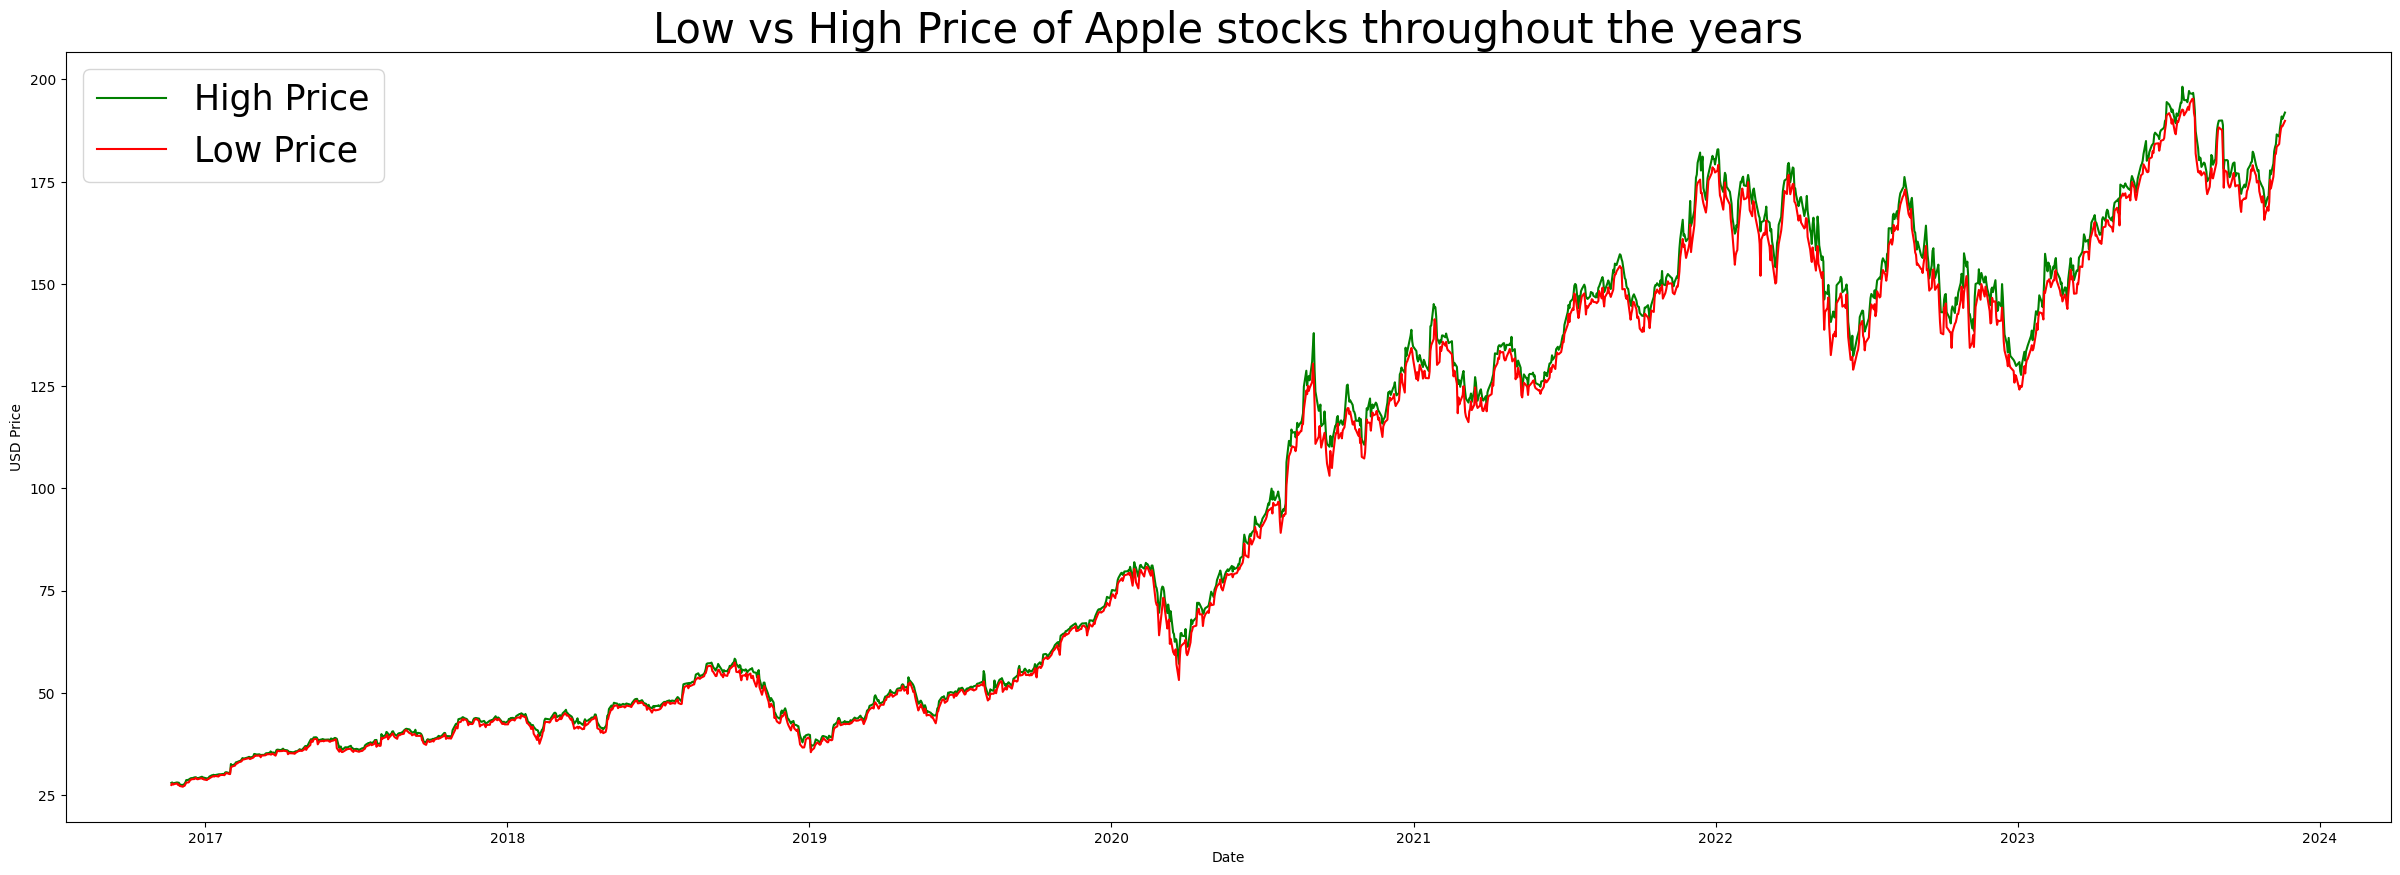

In [20]:
# Creating a line chart to visualize the high and low prices of Apple stocks against the dates
plt.subplots(figsize=(30,10))
plt.plot(apple_df.date, apple_df.high, 'g')
plt.plot(apple_df.date, apple_df.low, 'r')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.title('Low vs High Price of Apple stocks throughout the years',fontsize=30)
plt.legend(['High Price', 'Low Price'], fontsize=25);

### **<span style="color:red;">Observations:</span>**
- From the above line charts, we can say that from the mid of the year 2020 the high as well as low prices of Apple stocks started increasing.

- There was a sudden downfall in the high and low prices of stocks in the mid of the year 2022 and at the start of year 2023.

#### Comparing the Low and High Price of Tesla stocks throughout the years

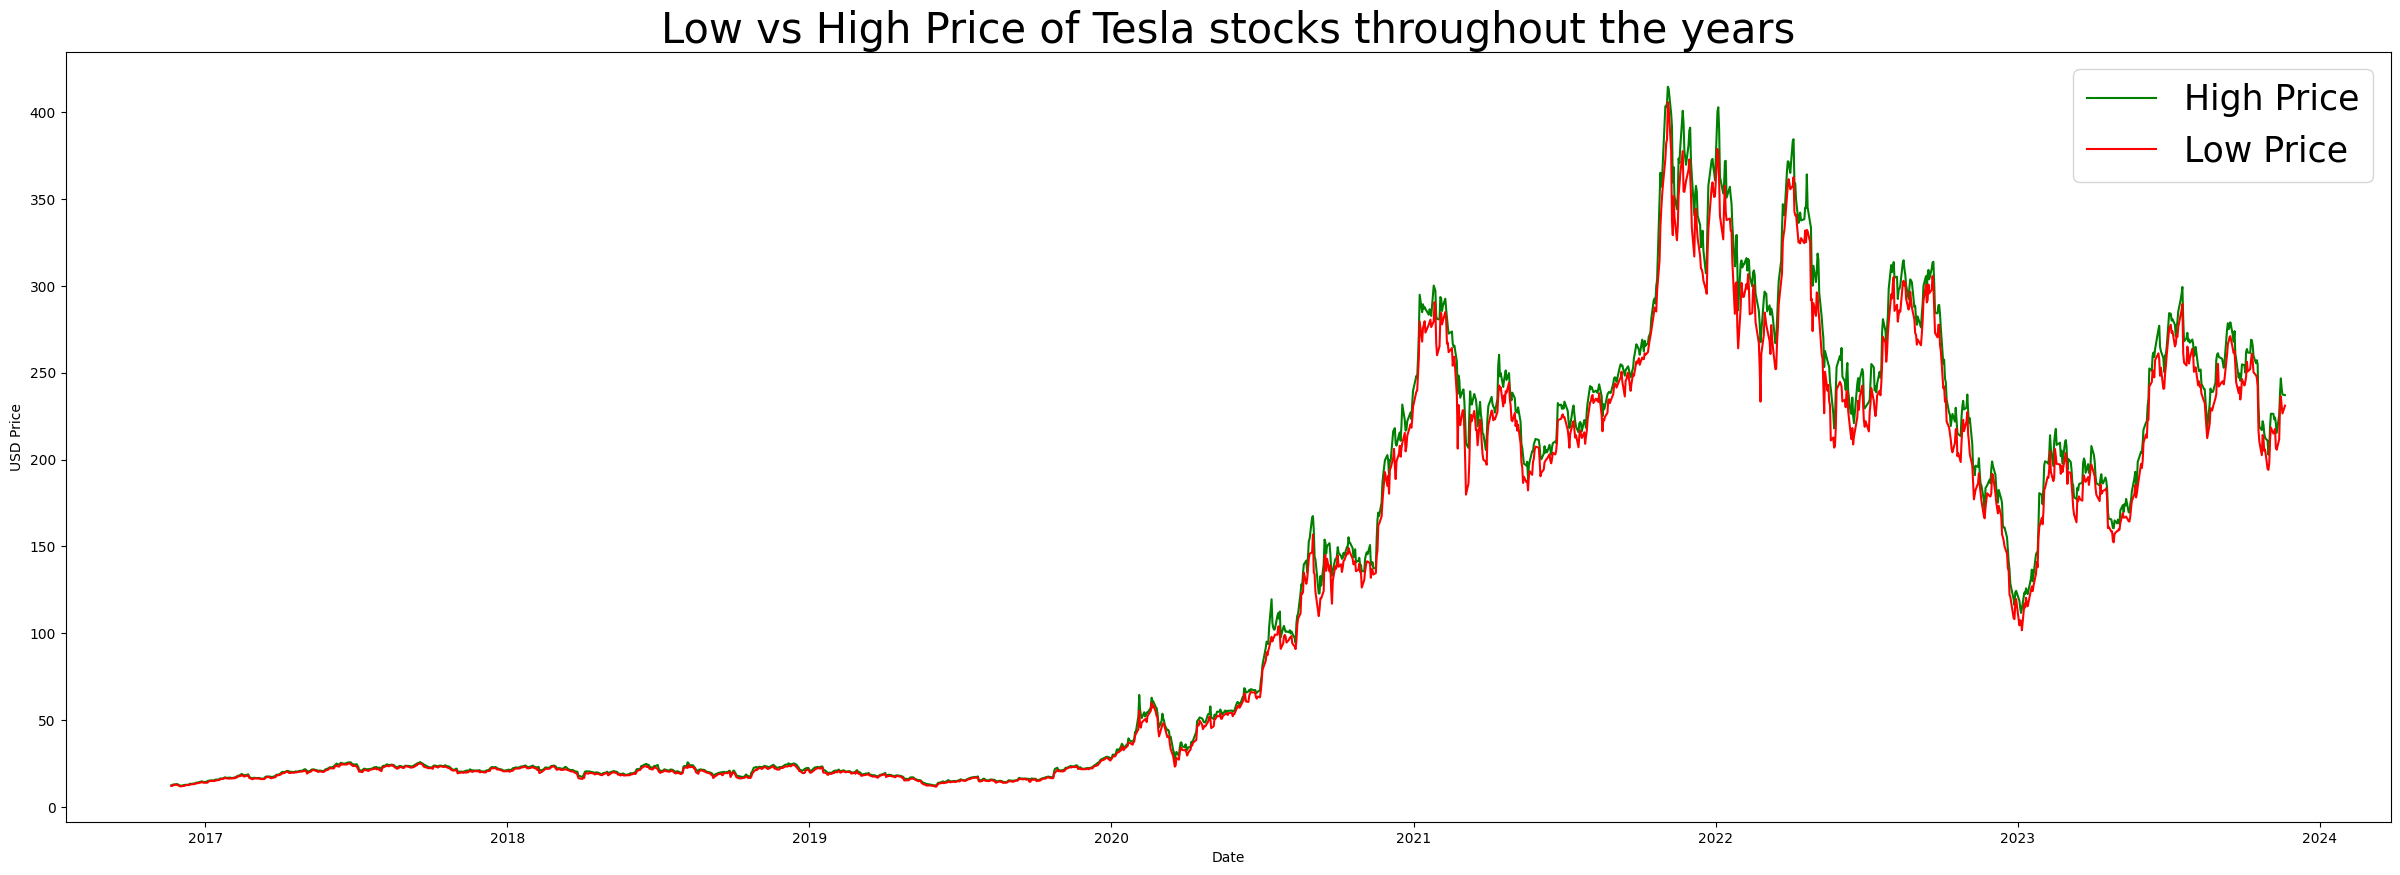

In [21]:
# Similarly, creating a line chart to visualize the high and low prices of Tesla stocks against the dates
plt.subplots(figsize=(30,10))
plt.plot(tesla_df.date, tesla_df.high, 'g')
plt.plot(tesla_df.date, tesla_df.low, 'r')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.title('Low vs High Price of Tesla stocks throughout the years',fontsize=30)
plt.legend(['High Price', 'Low Price'], fontsize=25);

### **<span style="color:red;">Observations:</span>**
- From the above line charts, we can say that from the mid of the year 2020 the high as well as low prices of Tesla stocks started increasing.

- There was a sudden downfall at the start of the year 2023 in the high and low prices of stocks.

- At the end of the year 2021, the high as well as low prices of Tesla stocks were highest. 

#### Comparing the volumes of AAPL and TSLA stocks traded over years

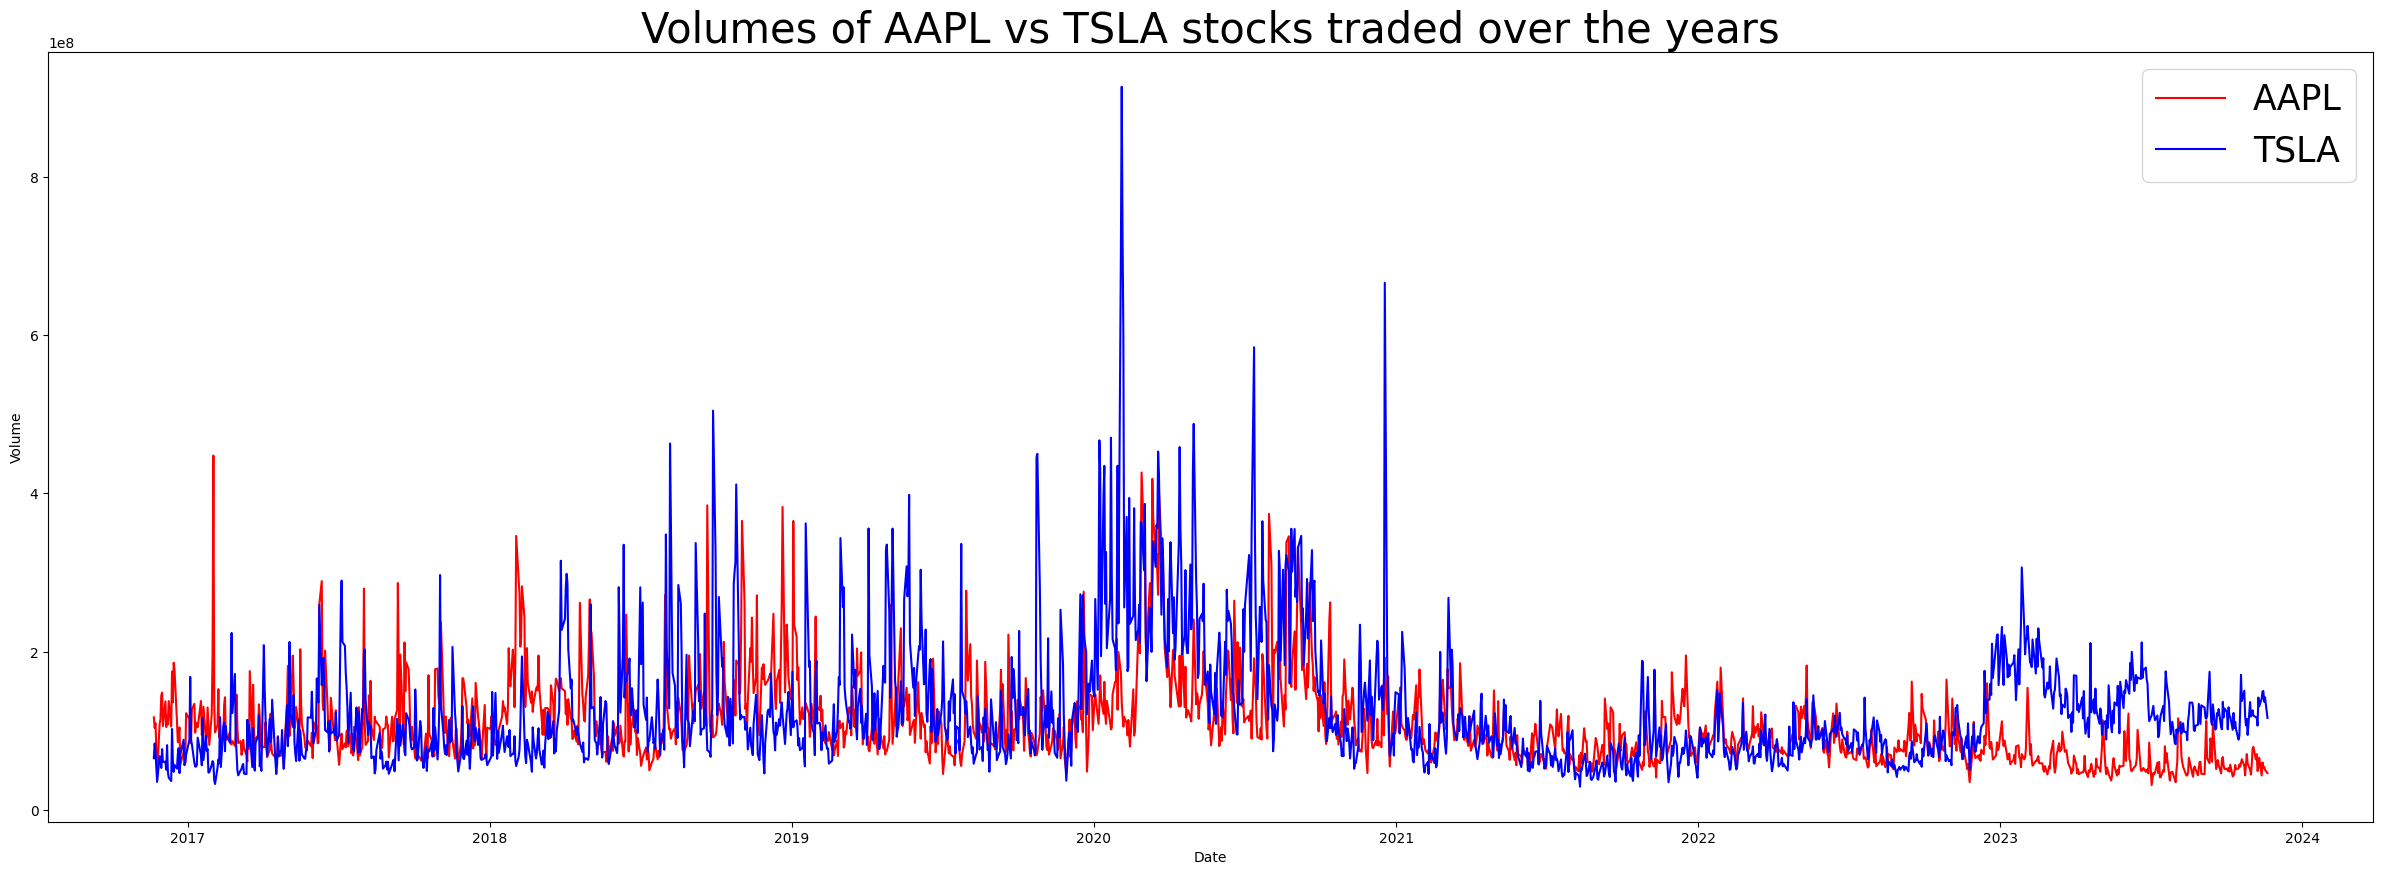

In [22]:
# Plotting the volume of AAPL (Apple) and TSLA (Tesla) stocks against the dates
plt.subplots(figsize=(30,10))
plt.plot(apple_df.date, apple_df.volume, 'r')
plt.plot(tesla_df.date, tesla_df.volume, 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volumes of AAPL vs TSLA stocks traded over the years',fontsize=30)
plt.legend(['AAPL', 'TSLA'], fontsize=25);

### **<span style="color:red;">Observations:</span>**
- From the above line charts, we can say that the volume of Tesla stocks traded over the years is higher than that of Apple stocks.

- At the start of 2020 and 2021, there is sudden increase in the trade of Tesla stocks.

- The volume of Apple stocks tarded over years is lower as compare to the Tesla stocks.

#### Visualizing the correlation matrix of Apple stocks

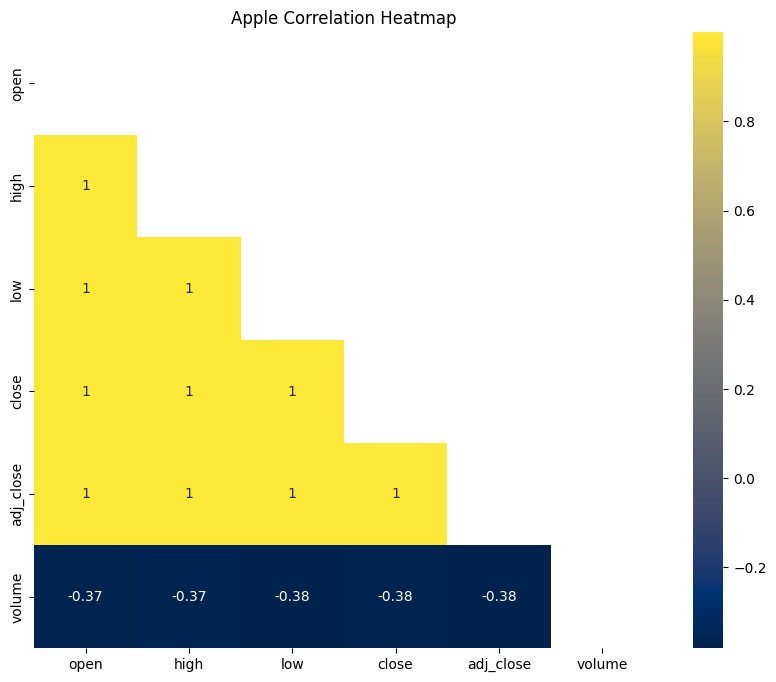

In [23]:
# Creating a heatmap to visualize the correlation matrix of selected columns from the apple DataFrame. 
# The upper triangular part of the heatmap is masked to avoid redundancy, and annotations are added to display correlation values.
mask = np.triu(np.ones_like(apple_df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(apple_df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr(), annot=True, cmap='cividis', mask=mask)
plt.title('Apple Correlation Heatmap')
plt.show()

#### Visualizing the correlation matrix of Tesla stocks

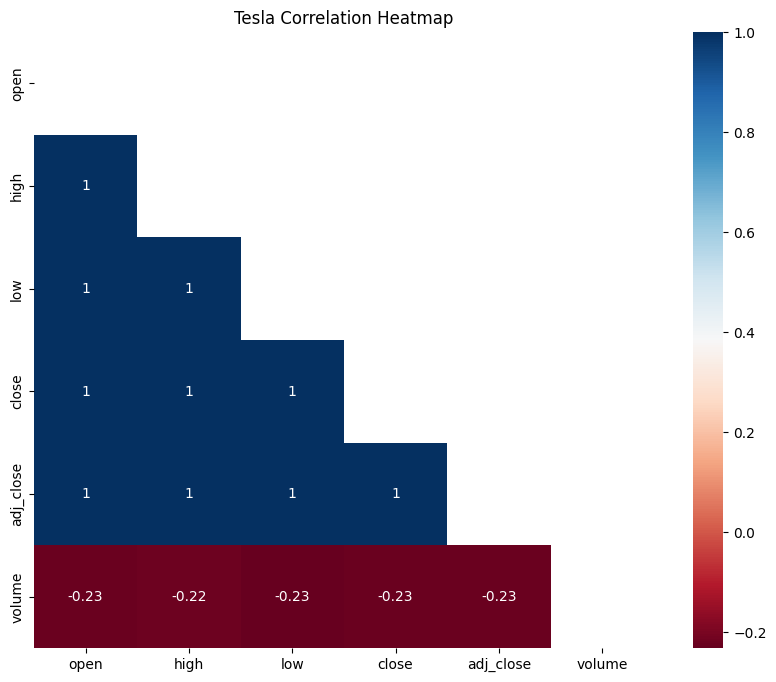

In [24]:
# Similarly, creating a heatmap to visualize the correlation matrix of selected columns from the tesla DataFrame
mask = np.triu(np.ones_like(tesla_df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(tesla_df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr(), annot=True, cmap='RdBu', mask=mask)
plt.title('Tesla Correlation Heatmap')
plt.show()

### Comparing the opening, closing, high and low prices of Apple and Tesla stocks

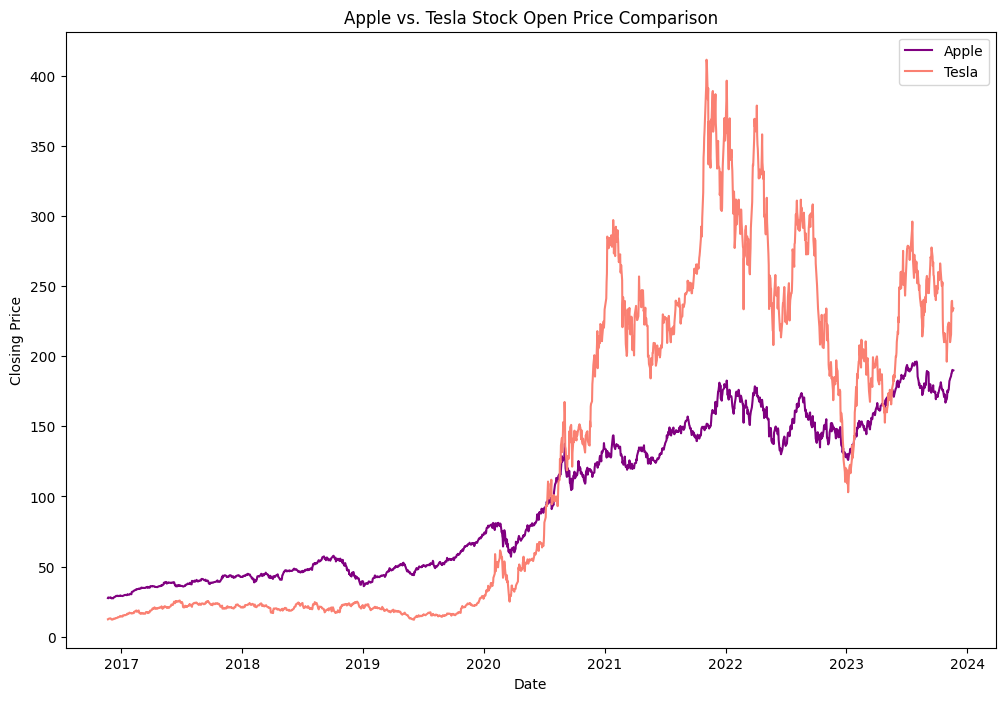

In [25]:
# Comparing the opening prices of Apple and Tesla 
plt.figure(figsize=(12, 8))
plt.plot(apple_df['date'], apple_df['open'], label='Apple', color='purple')
plt.plot(tesla_df['date'], tesla_df['open'], label='Tesla', color='salmon')
plt.title('Apple vs. Tesla Stock Open Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

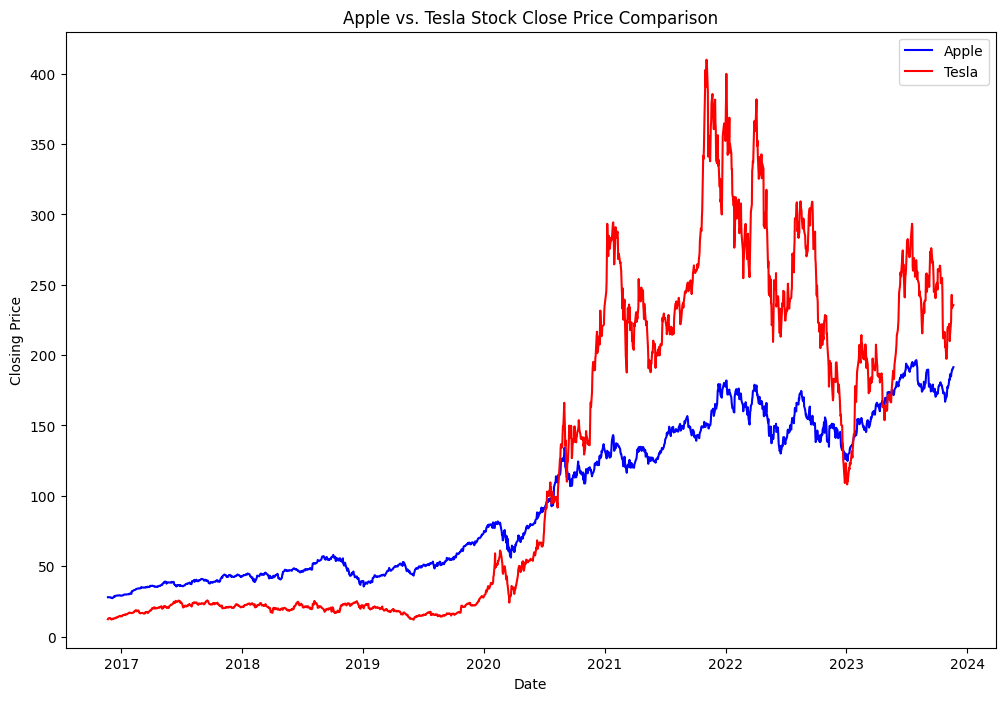

In [26]:
# Comparing the closing prices of Apple and Tesla 
plt.figure(figsize=(12, 8))
plt.plot(apple_df['date'], apple_df['close'], label='Apple', color='blue')
plt.plot(tesla_df['date'], tesla_df['close'], label='Tesla', color='red')
plt.title('Apple vs. Tesla Stock Close Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

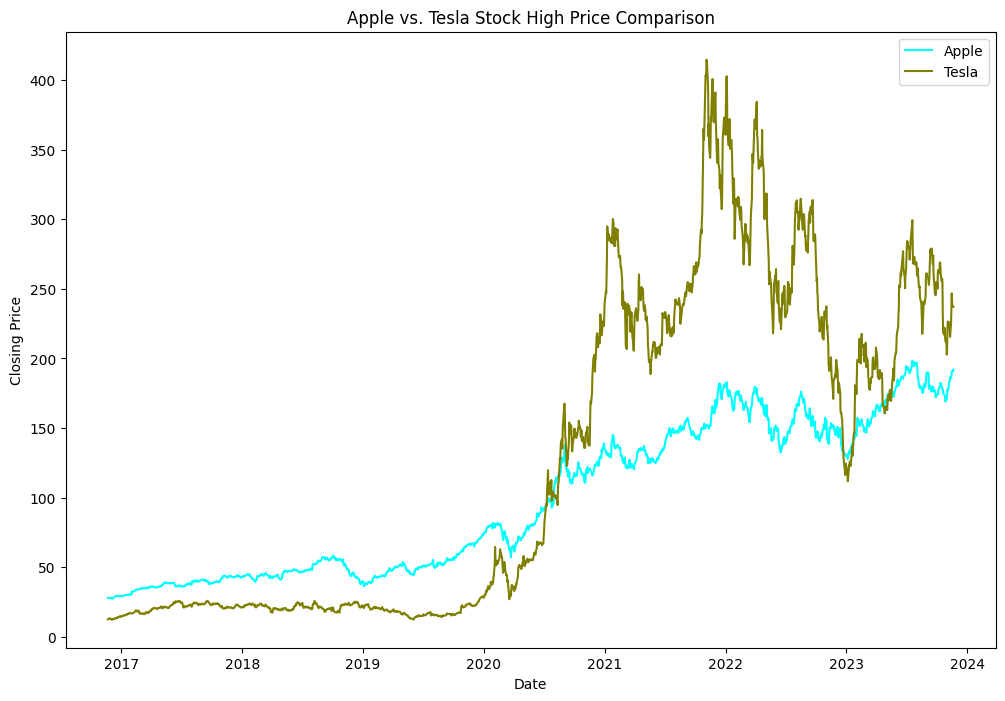

In [27]:
# Comparing the high price of Apple and Tesla 
plt.figure(figsize=(12, 8))
plt.plot(apple_df['date'], apple_df['high'], label='Apple', color='cyan')
plt.plot(tesla_df['date'], tesla_df['high'], label='Tesla', color='olive')
plt.title('Apple vs. Tesla Stock High Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

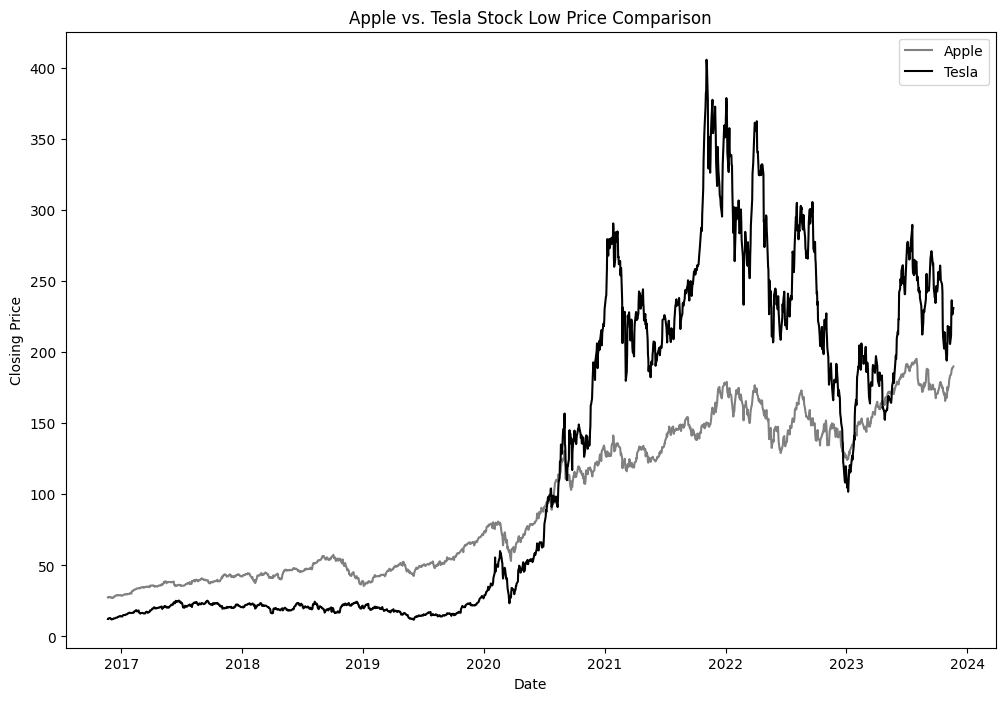

In [28]:
# Comparing the low price of Apple and Tesla
plt.figure(figsize=(12, 8))
plt.plot(apple_df['date'], apple_df['low'], label='Apple', color='grey')
plt.plot(tesla_df['date'], tesla_df['low'], label='Tesla', color='black')
plt.title('Apple vs. Tesla Stock Low Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### **<span style="color:red;">Observations:</span>**
From the above line charts of Apple vs Tesla stock Close, Open, High, Low:
- We can see that there is a significant decrease in Tesla and Apple stock prices in 2020. By researching the reason behind this reduction we found that due to the COVID-19 pandemic there was a sudden decrease in stock market. The global financial impact of the COVID-19 pandemic led to widespread economic disruptions.

- We can see that there is a sudden increase in the late 2021. By researching we came to know the reason behind it. In late 2021, Tesla's stock surged due to robust earnings and delivery figures, defying industry challenges. Positive sentiment around electric vehicle (EV) markets, Tesla's expansion plans, and its inclusion in the S&P 500 bolstered investor confidence. Additionally, the global growth of the EV industry amplified Tesla's position as a leader in sustainable transportation, contributing to the notable increase in its stock price.

#### Comparing the Average Closing Price by Month for Apple and Tesla stocks 

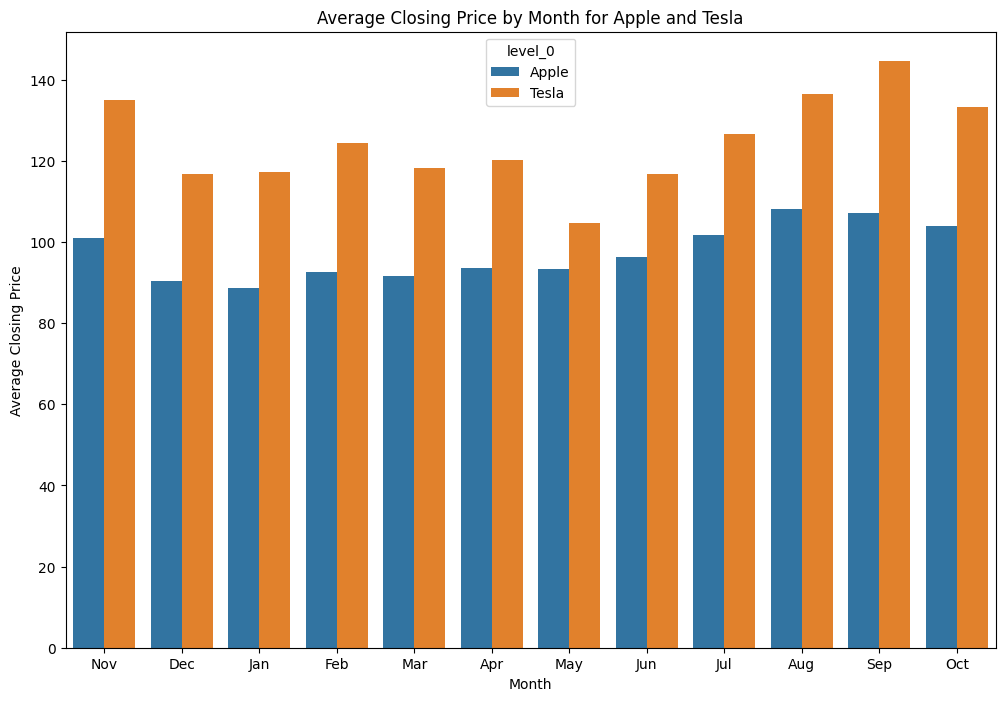

In [29]:
# Combining Apple and Tesla stock data into a single DataFrame using concat method
combined_data = pd.concat([apple_df, tesla_df], keys=['Apple', 'Tesla'])

# Adding a 'month' column extracted from the 'date' column
combined_data['month'] = combined_data['date'].dt.month

combined_data['month'] = combined_data['date'].dt.month

# Map month numbers to month names
combined_data['month_name'] = combined_data['month'].apply(lambda x: calendar.month_abbr[x])

# Creating a bar plot using Seaborn to show the average closing price by month for Apple and Tesla stocks
plt.figure(figsize=(12, 8))
sns.barplot(x='month_name', y='close', hue='level_0', data=combined_data.reset_index(), ci=None)
plt.title('Average Closing Price by Month for Apple and Tesla')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.show()

### **<span style="color:red;">Observation:</span>**
- From the above bar chart, we can say that the average closing prices of Tesla stocks by month are greater than that of Apple. The most highest closing price was in the month September. The closing price was also higher November, August and October. 

- The average closing prices of Apple stocks by month are lower than Tesla. The lowest closing prices of Apple stocks were in the month of January and December that is at the start and end of year the stocks were lowest.

### Finding the distribution of trading volumes of Apple and Tesla stocks 

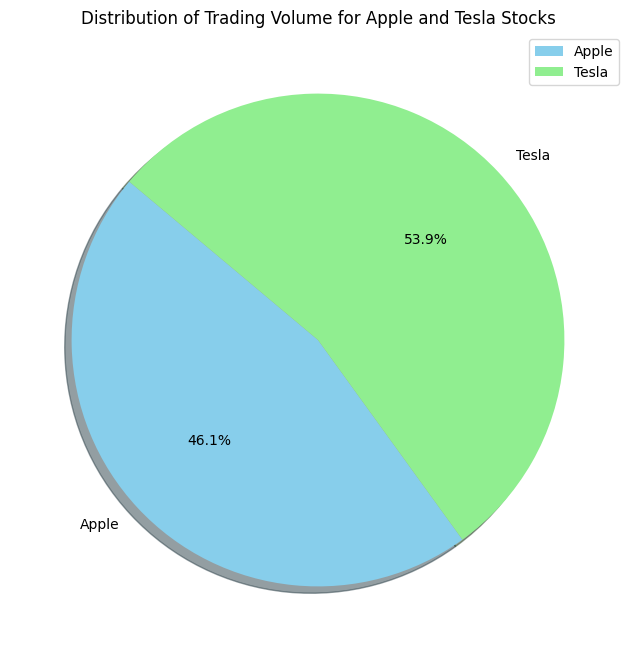

In [30]:
# Combine data
combined_data = pd.concat([apple_df, tesla_df], keys=['Apple', 'Tesla'])

# Sum the volume for each company
volume_sum = combined_data.groupby(level = 0)['volume'].sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(volume_sum, labels = volume_sum.index, autopct = '%1.1f%%', startangle = 140, colors = ['skyblue', 'lightgreen'], shadow = True)
plt.title('Distribution of Trading Volume for Apple and Tesla Stocks')
plt.legend(['Apple','Tesla'])
plt.show()

### **<span style="color:red;">Observation:</span>**
- From the above pie chart, we can say that the trading volume for Tesla is higher than Apple which is 53.9%. And the trading volume for Apple is lower which is 46.1%.

###  Comparing the volumes of Apple and Tesla stocks for each weekday. 

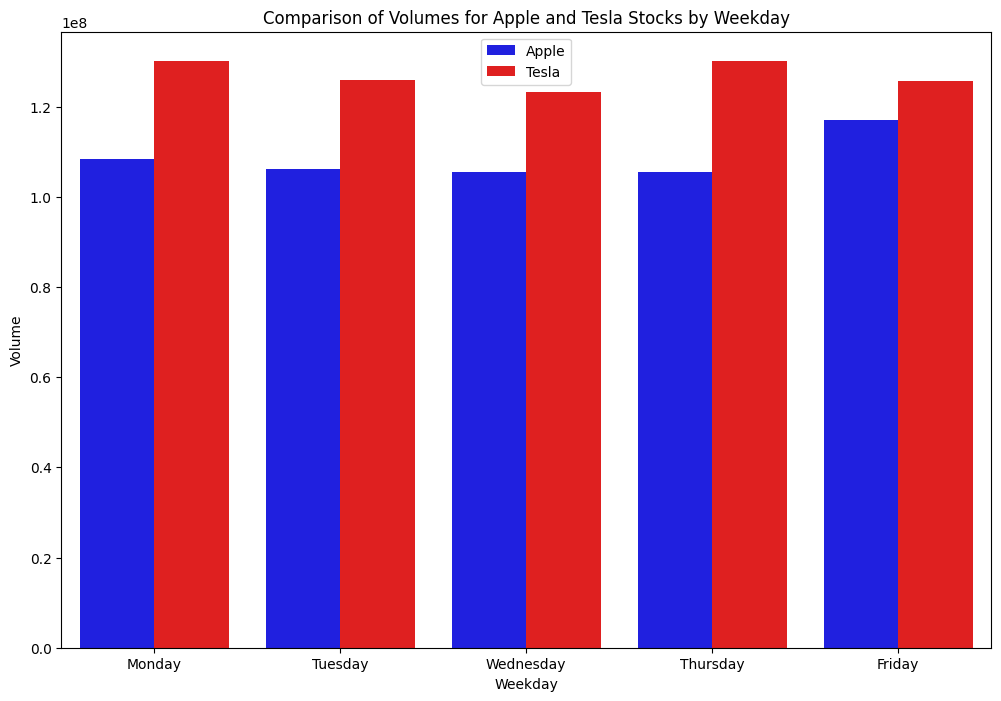

In [31]:
# Combining data
combined_data = pd.concat([apple_df, tesla_df], keys=['Apple', 'Tesla'])

# Define custom colors for Apple and Tesla bars
custom_palette = {'Apple': 'blue', 'Tesla': 'red'}

# Plotting a bar chart
plt.figure(figsize = (12, 8))
sns.barplot(x ='weekday', y ='volume', hue ='level_0', data = combined_data.reset_index(), ci = None, palette = custom_palette)
plt.title('Comparison of Volumes for Apple and Tesla Stocks by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Volume')
plt.xticks(ticks = range(5), labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.legend(['Apple', 'Tesla'])
plt.show()

### **<span style="color:red;">Observation:</span>**
- From the above bar chart, we can say that the volume of Tesla stocks is higher than that of Apple stocks for each weekday.

- On Friday the volume of Apple stocks was greater than rest of the weekdays.

---

### **Stock Prediction using Linear Regression**

### Now, we prepare the regression model to predict the stock prices

In [32]:
# Creating a function to fit the data
def prepare_data(df, forecast_col, forecast_out, test_size):
    label = df[forecast_col].shift(-forecast_out) # creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) # creating the feature array
    X = preprocessing.scale(X) # processing the feature array
    X_lately = X[-forecast_out:] # creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) # dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) # cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

#### Using Machine Learning's **Regression Model** we predict the stock prices for the next five days

#### Initializing linear regression model fo AAPL stocks

In [33]:
# Initializing linear regression model
apple_learner = LinearRegression()

#### Calling the function for data preparation and training the model for AAPL stocks

In [34]:
# Creating linear regression model and fitting it on the training data
# calling the method where the cross validation and data preperation is in
apple_X_train, apple_X_test, apple_Y_train, apple_Y_test , apple_X_lately = prepare_data(apple_df, forecast_col = 'low', forecast_out = 5, test_size = 0.2); 

apple_learner.fit(apple_X_train, apple_Y_train) # training the linear regression model

LinearRegression()

#### Evaluating the model using **Accuracy** performance metric for AAPL stocks 

In [35]:
# Using accuracy performance metric to evaluate the model
apple_score = apple_learner.score(apple_X_test, apple_Y_test) # testing the linear regression model
print(f'Accuracy for the AAPL prediction model is {apple_score * 100}%')

Accuracy for the AAPL prediction model is 99.19850994909741%


#### Predicting the stock low prices for AAPL for the next five days 

In [36]:
apple_forecast = apple_learner.predict(apple_X_lately)
print('The prediction for AAPL low prices for the next five days is:', apple_forecast.tolist())

The prediction for AAPL low prices for the next five days is: [186.56263215555524, 188.03962701284337, 188.9078578329715, 188.82803303097887, 190.13537461099511]


#### **<span style="color:blue;">Conclusion:</span>**

### From the above results we can say that our AAPL prediction model is 99.25% accurate.

In [37]:
print(f'The predicted low prices of AAPL for the next five days are {apple_forecast.tolist()}')

The predicted low prices of AAPL for the next five days are [186.56263215555524, 188.03962701284337, 188.9078578329715, 188.82803303097887, 190.13537461099511]


#### Using regression model the predicted low prices of AAPL stocks for next five days are:

- Nov 21, 2023 - 187.71
- Nov 22, 2023 - 188.28
- Nov 24, 2023 - 189.97
- Nov 27, 2023 - 189.95
- Nov 28, 2023 - 191.71

#### The actual low prices of AAPL stocks for next five days are:

- Nov 21, 2023 - 189.74
- Nov 22, 2023 - 190.83
- Nov 24, 2023 - 189.25
- Nov 27, 2023 - 188.90	
- Nov 28, 2023 - 189.40	

In [38]:
apple_actual = [189.74, 190.83, 189.25, 188.90, 189.40]
print(f'The actual low prices of AAPL for the next five days are {apple_actual}')

The actual low prices of AAPL for the next five days are [189.74, 190.83, 189.25, 188.9, 189.4]


In [48]:
date_df = ['2023-11-21', '2023-11-22', '2023-11-24', '2023-11-27', '2023-11-28']

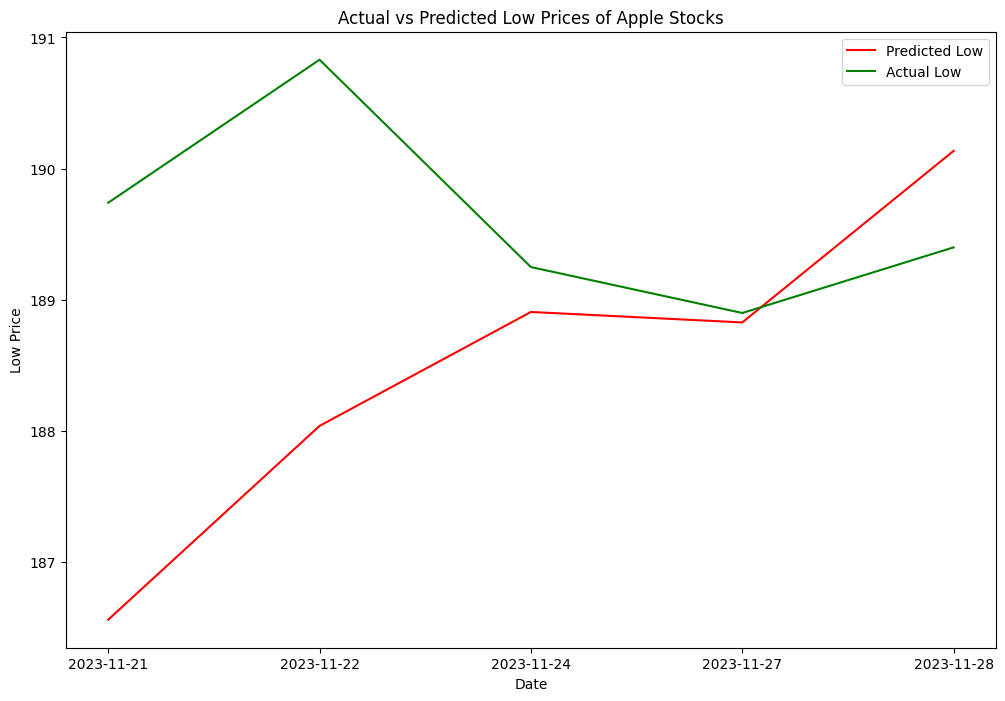

In [49]:
# Comparing the predicted and actual low price of Apple Stocks
plt.figure(figsize=(12, 8))
plt.plot(date_df, apple_forecast, label='Predicted Low', color='red')
plt.plot(date_df, apple_actual, label='Actual Low', color='green')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Actual vs Predicted Low Prices of Apple Stocks')
plt.legend()
plt.show()

---

#### Initializing linear regression model for TSLA stocks

In [39]:
# Initializing linear regression model
tesla_learner = LinearRegression()

#### Calling the function for data preparation and training the model for TSLA stocks

In [40]:
# Creating linear regression model and fitting it on the training data
# calling the method where the cross validation and data preperation is in
tesla_X_train, tesla_X_test, tesla_Y_train, tesla_Y_test , tesla_X_lately = prepare_data(tesla_df, forecast_col = 'open', forecast_out = 5, test_size = 0.2); 

tesla_learner.fit(tesla_X_train, tesla_Y_train) # training the linear regression model

LinearRegression()

#### Evaluating the model using **Accuracy** performance metric for TSLA stocks 

In [41]:
# Using accuracy performance metric to evaluate the model
tesla_score = tesla_learner.score(tesla_X_test, tesla_Y_test) # testing the linear regression model
print(f'Accuracy for the TSLA prediction model is {tesla_score * 100}%')

Accuracy for the TSLA prediction model is 98.18469737404703%


#### Predicting the stock prices for TSLA for the next five days 


In [42]:
tesla_forecast = tesla_learner.predict(tesla_X_lately)
print('The prediction for AAPL open price for the next five days is:', tesla_forecast.tolist())

The prediction for AAPL open price for the next five days is: [234.7562348038328, 238.98124323042993, 239.17961261438225, 231.75111993569425, 233.77435931471666]


#### **<span style="color:blue;">Conclusion:</span>**

### From the above results we can say that our TSLA prediction model is 98.18% accurate.

In [43]:
print(f'The predicted open prices of TSLA for the next five days are {tesla_forecast.tolist()}')

The predicted open prices of TSLA for the next five days are [234.7562348038328, 238.98124323042993, 239.17961261438225, 231.75111993569425, 233.77435931471666]


#### Using regression model the predicted open prices of TSLA stocks for next five days are:

- Nov 21, 2023 - 234.75
- Nov 22, 2023 - 238.98
- Nov 24, 2023 - 239.17
- Nov 27, 2023 - 231.75
- Nov 28, 2023 - 233.77

#### The actual open prices of TSLA stocks for next five days are:

- Nov 21, 2023 - 235.04
- Nov 22, 2023 - 242.04
- Nov 24, 2023 - 233.75
- Nov 27, 2023 - 236.89
- Nov 28, 2023 - 236.68	

In [44]:
tesla_actual = [235.04, 242.04, 233.75, 236.89, 236.68]
print(f'The actual open prices of TSLA for the next five days are {tesla_actual}')

The actual open prices of TSLA for the next five days are [235.04, 242.04, 233.75, 236.89, 236.68]


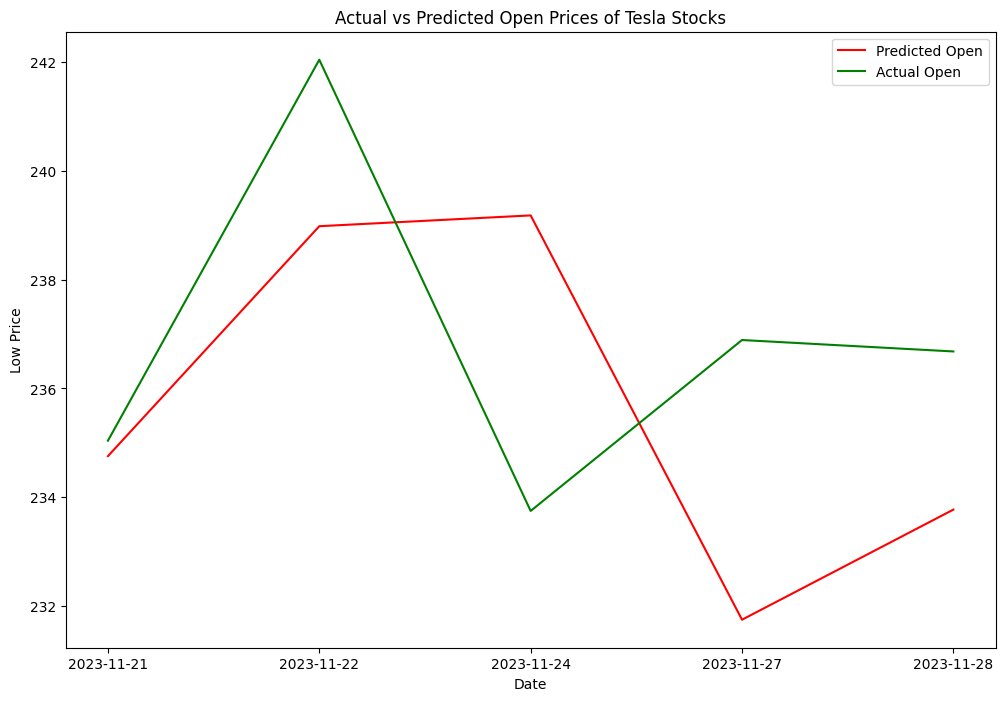

In [50]:
# Comparing the predicted and actual open price of Tesla Stocks
plt.figure(figsize=(12, 8))
plt.plot(date_df, tesla_forecast, label='Predicted Open', color='red')
plt.plot(date_df, tesla_actual, label='Actual Open', color='green')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Actual vs Predicted Open Prices of Tesla Stocks')
plt.legend()
plt.show()

---